In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

def compare_linear_non_linear_models(df, target_column='LABEL'):
    # Split the data into features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit a linear model
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    linear_residuals = y_test - linear_model.predict(X_test)

    # Fit a non-linear model
    non_linear_model = RandomForestRegressor()
    non_linear_model.fit(X_train, y_train)
    non_linear_residuals = y_test - non_linear_model.predict(X_test)

    # Print MSE for both models
    linear_mse = mean_squared_error(y_test, linear_model.predict(X_test))
    non_linear_mse = mean_squared_error(y_test, non_linear_model.predict(X_test))

    print(f'Linear Model MSE: {linear_mse}')
    print(f'Non-linear Model MSE: {non_linear_mse}')

    # Plot residuals
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.scatterplot(x=y_test, y=linear_residuals)
    plt.axhline(0, ls='--', color='r')
    plt.title('Linear Model Residuals')

    plt.subplot(1, 2, 2)
    sns.scatterplot(x=y_test, y=non_linear_residuals)
    plt.axhline(0, ls='--', color='r')
    plt.title('Non-linear Model Residuals')

    plt.tight_layout()
    plt.show()


Linear Model MSE: 0.06665077170007973
Non-linear Model MSE: 0.005251726708074534


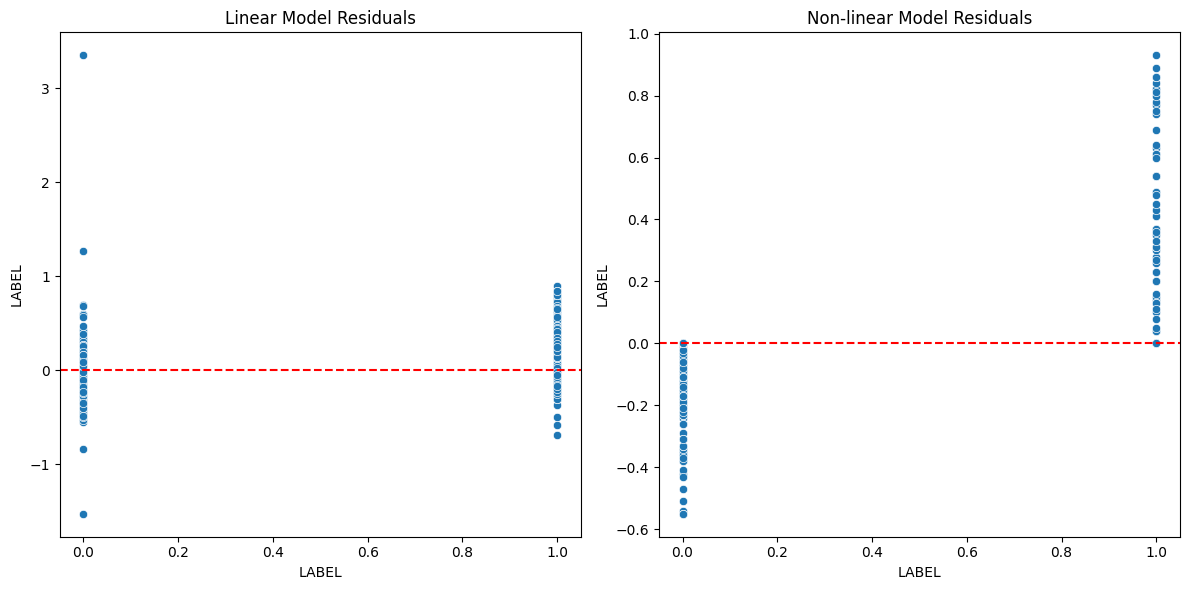

In [3]:


df = pd.read_excel("C:\\Users\\dev\\Desktop\\MSC thesis\\Code\\Backup_datasets\\ML training\\df_mice_labeled_after_PCA.xlsx")
compare_linear_non_linear_models(df, target_column='LABEL')

- Linear Model Residuals (Left Plot):

    - The residuals show a noticeable pattern with larger deviations for certain values of the target variable.
This pattern suggests that the linear model is not capturing some underlying structure in the data, which is indicative of non-linearity.

- Non-linear Model Residuals (Right Plot):

    - The residuals are more tightly clustered around the zero line, with fewer large deviations.
This indicates that the non-linear model is capturing the data's structure more effectively, reducing residual error and better fitting the data.

- Conclusion:
    - The linear model's residuals showing a pattern and large deviations imply that the relationships in the data are not purely linear.
    - The non-linear model's residuals being more centered around zero confirm that a non-linear model fits the data much better.
    - The significant difference in MSE values also supports this conclusion.
    - Thus, the data likely contains non-linear relationships, making non-linear models more suitable for this dataset.